In [2]:
# Importing the Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa

plt.style.use("ggplot")

import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.colorbar import Colorbar
import IPython.display as ipd

from IPython.display import Audio
from pydub import AudioSegment, effects
from pydub.silence import split_on_silence
from pydub.playback import play

import time
import warnings

warnings.filterwarnings("ignore")

In [3]:
AUDIO_DIR = "/Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama"
TRANSCRIPT_DIR = (
    "/Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama_transcripts"
)
AUDIO_FILE_NAMES = [
    os.path.join(AUDIO_DIR, file) for file in os.listdir(AUDIO_DIR)
]
TRANSCRIPT_FILE_NAMES = [
    os.path.join(TRANSCRIPT_DIR, file) for file in os.listdir(TRANSCRIPT_DIR)
]
FILE_PAIRS = list(zip(AUDIO_FILE_NAMES, TRANSCRIPT_FILE_NAMES))
BASE_NAMES = [os.path.basename(file).split(".")[0] for file in AUDIO_FILE_NAMES]

In [4]:
print("Number of Audio Files: ", len(AUDIO_FILE_NAMES))
print("Number of Transcript Files: ", len(TRANSCRIPT_FILE_NAMES))

Number of Audio Files:  260
Number of Transcript Files:  260


In [5]:
with open(TRANSCRIPT_FILE_NAMES[0], "r") as file:
    transcript = file.read()
    print(transcript)
ipd.display(Audio(AUDIO_FILE_NAMES[0]))

यह बात सत्य है कि जो अध्यक्ष होना चाहता है, तो वह भले काम की इच्छा करता है।
यह आवश्यक है कि अध्यक्ष निर्दोष, और एक ही पत्नी का पति, संयमी, सुशील, सभ्य, अतिथि-सत्कार करनेवाला, और सिखाने में निपुण हो।
पियक्कड़ या मारपीट करनेवाला न हो; वरन् कोमल हो, और न झगड़ालू, और न धन का लोभी हो।
अपने घर का अच्छा प्रबन्ध करता हो, और बाल-बच्चों को सारी गम्भीरता से अधीन रखता हो।
जब कोई अपने घर ही का प्रबन्ध करना न जानता हो, तो परमेश्वर की कलीसिया की रखवाली कैसे करेगा?
फिर यह कि नया चेला न हो, ऐसा न हो कि अभिमान करके शैतान के समान दण्ड पाए।
और बाहरवालों में भी उसका सुनाम हो ऐसा न हो कि निन्दित होकर शैतान के फंदे में फँस जाए।
वैसे ही सेवकों को भी गम्भीर होना चाहिए, दो रंगी, पियक्कड़, और नीच कमाई के लोभी न हों;
पर विश्वास के भेद को शुद्ध विवेक से सुरक्षित रखें।
और ये भी पहले परखे जाएँ, तब यदि निर्दोष निकलें तो सेवक का काम करें।
इसी प्रकार से स्त्रियों को भी गम्भीर होना चाहिए; दोष लगानेवाली न हों, पर सचेत और सब बातों में विश्वासयोग्य हों।
सेवक एक ही पत्नी के पति हों और बाल-बच्चों और अपने घरों का अच्छा प्रबन्

In [1]:
def remove_punctuation(line):
    return (
        line.replace(",", "")
        .replace(".", "")
        .replace("?", "")
        .replace("!", "")
        .replace(";", "")
        .replace(":", "")
        .replace(full_stop_hindi, "")
        .replace("।", "")
        .replace('"', "")
        .replace("“", "")
        .replace("”", "")
        .replace("‘", "")
        .replace("’", "")
        .replace("-", "")
    )

file = "/Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama_transcripts/B01___01_Matthew_____HINBCSN1DA.txt"
with open(file, "r", encoding="utf-8") as f:
    # read all lines one by one
    lines = f.readlines()
    lines = [line.strip() for line in lines]
    print(lines)

full_stop_hindi = lines[0][-1]

['अब्राहम की सन्तान, दाऊद की सन्तान, यीशु मसीह की वंशावली।', 'अब्राहम से इसहाक उत्पन्न हुआ, इसहाक से याकूब उत्पन्न हुआ, और याकूब से यहूदा और उसके भाई उत्पन्न हुए।', 'यहूदा और तामार से पेरेस व जेरह उत्पन्न हुए, और पेरेस से हेस्रोन उत्पन्न हुआ, और हेस्रोन से एराम उत्पन्न हुआ।', 'एराम से अम्मीनादाब उत्पन्न हुआ, और अम्मीनादाब से नहशोन, और नहशोन से सलमोन उत्पन्न हुआ।', 'सलमोन और राहाब से बोअज उत्पन्न हुआ, और बोअज और रूत से ओबेद उत्पन्न हुआ, और ओबेद से यिशै उत्पन्न हुआ।', 'और यिशै से दाऊद राजा उत्पन्न हुआ। और दाऊद से सुलैमान उस स्त्री से उत्पन्न हुआ जो पहले ऊरिय्याह की पत्नी थी।', 'सुलैमान से रहबाम उत्पन्न हुआ, और रहबाम से अबिय्याह उत्पन्न हुआ, और अबिय्याह से आसा उत्पन्न हुआ।', 'आसा से यहोशाफात उत्पन्न हुआ, और यहोशाफात से योराम उत्पन्न हुआ, और योराम से उज्जियाह उत्पन्न हुआ।', 'उज्जियाह से योताम उत्पन्न हुआ, योताम से आहाज उत्पन्न हुआ, और आहाज से हिजकिय्याह उत्पन्न हुआ।', 'हिजकिय्याह से मनश्शे उत्पन्न हुआ, मनश्शे से आमोन उत्पन्न हुआ, और आमोन से योशिय्याह उत्पन्न हुआ।', 'और बन्दी होकर बाबेल जान

In [7]:
transcript_dir = TRANSCRIPT_DIR
transcript_files = TRANSCRIPT_FILE_NAMES
bag_of_words = set()
counter = {}
for file in transcript_files:
    file = os.path.join(transcript_dir, file)
    with open(file, "r", encoding="utf-8") as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines]
        for line in lines:
            # remove all punctuation
            line = remove_punctuation(line)
            words = line.split(" ")
            for word in words:
                bag_of_words.add(word)
                if word in counter:
                    counter[word] += 1
                else:
                    counter[word] = 1

print(f"Total number of words in transcript are {len(bag_of_words)}")


Total number of words in transcript are 6639


Even in English language we would see words like "is", "the" , "there", "us" would occure most frequently. 

Same is the case here as well, connector words seem to occure more , which i dont think is an issue.

After the connector words , parmeshwar , the word equivalent for god , occures the most. This is not surprising as this is the transcript of the new testament after all. however when training this can lead to biases, our trained model might never learn or give importance to synonyms of the same word like "bhagwan" or "ishwar".

In [9]:
# getting a sense of which words occur the most in the transcript
counter = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
counter

{'और': 8362,
 'के': 5352,
 'है': 4486,
 'से': 4192,
 'में': 3828,
 'को': 2770,
 'कि': 2751,
 'की': 2475,
 'पर': 2239,
 'जो': 2185,
 'का': 2014,
 'वह': 2011,
 'तो': 1927,
 'ने': 1779,
 'न': 1745,
 'नहीं': 1605,
 'तुम': 1605,
 'हैं': 1506,
 'हो': 1467,
 'मैं': 1379,
 'भी': 1372,
 'परमेश्वर': 1362,
 'यह': 1260,
 'कहा': 1253,
 'क्योंकि': 1196,
 'एक': 1132,
 'अपने': 1106,
 'था': 1079,
 'परन्तु': 1035,
 'लिये': 997,
 'उसके': 978,
 'यीशु': 961,
 'वे': 960,
 'उसने': 945,
 'हूँ': 932,
 'ही': 897,
 'सब': 876,
 'उस': 818,
 'जब': 814,
 'उसे': 782,
 'गया': 746,
 'हम': 730,
 'क्या': 675,
 'साथ': 671,
 'दिया': 666,
 'तब': 652,
 'प्रभु': 632,
 'किया': 626,
 'पास': 606,
 'थे': 598,
 'इसलिए': 592,
 'हे': 591,
 'कोई': 579,
 'कुछ': 567,
 'यदि': 555,
 'तू': 555,
 'मसीह': 551,
 'उससे': 536,
 'फिर': 530,
 'मेरे': 509,
 'करता': 505,
 'हुआ': 502,
 'विश्वास': 486,
 'इस': 485,
 'कर': 480,
 'तक': 480,
 'मनुष्य': 463,
 'हुए': 461,
 'तुम्हारे': 445,
 'दिन': 428,
 'मुझे': 413,
 'उन्हें': 406,
 'गए': 398,
 'लोगों': 3

#### Number of sentences in the entire corpus
With this piece of code we can see that there are definitely ~8k sentences in the corpus. Breaking down each audio clip for each of these sentences will ensure a good alligned dataset.

In [27]:
# count the number of sentences
count_comma = 0
count_semi_colon = 0
count_fullstop = 0
count_question_mark = 0
count_exclamation_mark = 0
count_colon = 0

for file in transcript_files:
    file = os.path.join(transcript_dir, file)
    with open(file, "r", encoding="utf-8") as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines]
        
        for line in lines:
            count_comma += line.count(",")
            count_semi_colon += line.count(";")
            count_fullstop += line.count(full_stop_hindi)
            count_question_mark += line.count("?")
            count_exclamation_mark += line.count("!")
            count_colon += line.count(":")


print("Number of commas:", count_comma)
print("Number of semi-colons:", count_semi_colon)
print("Number of full stops:", count_fullstop)
print("Number of question marks:",count_question_mark)
print("Number of exclamation marks:", count_exclamation_mark)
print("Number of colons:", count_colon)


Number of commas: 14120
Number of semi-colons: 1992
Number of full stops: 7214
Number of question marks: 1027
Number of exclamation marks: 186
Number of colons: 340


On average one line seems to have 108 characters. 
Also except for one character ('\u200d') , all character seem to standard characters of hindi (vowels and consonants equivalent)

In [26]:
unique_characters = set()
lenght_of_lines = []
for file in transcript_files:
    file = os.path.join(transcript_dir, file)
    with open(file, "r", encoding="utf-8") as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines]
        
        for line in lines:
            lenght_of_lines.append(len(line))
            for character in line:
                unique_characters.add(character)

avg_length = np.array(lenght_of_lines).mean()
print(f"Average number of characters in a line is {avg_length}")
print(f"Number of unique characters is {len(unique_characters)}")
print(unique_characters)

Average number of characters in a line is 108.00836558871269
Number of unique characters is 76
{'झ', 'ग', ']', 'ऐ', 'य', 'ज', 'े', 'थ', ';', 'ड', 'घ', 'ई', 'फ', 'ठ', 'प', 'ः', '[', 'ँ', '—', 'व', 'ञ', 'ृ', '’', 'ा', 'ै', 'ख', 'ि', ')', ',', 'भ', ' ', 'ू', 'र', '!', 'इ', 'च', 'ट', '“', '्', 'ध', 'ष', 'त', 'ल', 'छ', 'ण', 'ौ', 'आ', ':', 'ु', 'ह', 'स', '़', '(', 'श', '\u200d', 'द', 'अ', 'औ', 'म', '?', '-', 'उ', 'ऋ', 'ो', 'क', 'न', 'ओ', 'ढ', '‘', 'ं', '।', '”', 'ऊ', 'ब', 'ए', 'ी'}


In [22]:
import torch
from datasets import load_dataset
from transformers import AutoModelForCTC, AutoProcessor
import torchaudio.functional as F

DEVICE_ID = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_ID = "ai4bharat/indicwav2vec-hindi"

model = AutoModelForCTC.from_pretrained(MODEL_ID).to(DEVICE_ID)
processor = AutoProcessor.from_pretrained(MODEL_ID)

# vocab from the auto processor
vocab = processor.tokenizer.get_vocab()
vocab

Some weights of the model checkpoint at ai4bharat/indicwav2vec-hindi were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at ai4bharat/indicwav2vec-hindi and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this mode

{'<s>': 1,
 '<pad>': 0,
 '</s>': 2,
 '<unk>': 3,
 '|': 4,
 'ँ': 5,
 'ं': 6,
 'ः': 7,
 'अ': 8,
 'आ': 9,
 'इ': 10,
 'ई': 11,
 'उ': 12,
 'ऊ': 13,
 'ऋ': 14,
 'ए': 15,
 'ऐ': 16,
 'ऑ': 17,
 'ओ': 18,
 'औ': 19,
 'क': 20,
 'ख': 21,
 'ग': 22,
 'घ': 23,
 'ङ': 24,
 'च': 25,
 'छ': 26,
 'ज': 27,
 'झ': 28,
 'ञ': 29,
 'ट': 30,
 'ठ': 31,
 'ड': 32,
 'ढ': 33,
 'ण': 34,
 'त': 35,
 'थ': 36,
 'द': 37,
 'ध': 38,
 'न': 39,
 'प': 40,
 'फ': 41,
 'ब': 42,
 'भ': 43,
 'म': 44,
 'य': 45,
 'र': 46,
 'ल': 47,
 'व': 48,
 'श': 49,
 'ष': 50,
 'स': 51,
 'ह': 52,
 '़': 53,
 'ा': 54,
 'ि': 55,
 'ी': 56,
 'ु': 57,
 'ू': 58,
 'ृ': 59,
 'ॅ': 60,
 'े': 61,
 'ै': 62,
 'ॉ': 63,
 'ो': 64,
 'ौ': 65,
 '्': 66,
 'ळ': 67}

### Differences between the characters present in the vocab of wave2vec2-Hindi and the characters in the transcript

<img src="/Users/Nishant/Desktop/sarvam/vocab-venn-diagram.png" width="1000" height="600">

Some observations here are : 
- we need to remove the brackets, punctuation marks from the transcripts to make it suitable for TTS or STT training. 
    This includes removing the hindi version of full stop (purna viram)
- Sentences should be surrounded by the sentence start ('\<s\>') and ending ('\</s\>') tokens . Purna viram , question mark and exclamation marks should be used to identify the ending of a sentence and from where the new sentence starts. 
- Audios should ideally be of less than 30 seconds in length , so the best way is to divide the audio according to the sentence being spoken in it. On average the number of words in a sentence is 20 , so we can safely say that time taken to speak a sentence by the author wont exceed more than 30 seconds. If it does we can break down the sentence by commas or semicolon, which is also present 
- In our transcripts the semi colon is used out of place, it will be best if remove it all together. This semi colon should not be misunderstood with the hindi character " ः"
- Not sure about this but there is a possibility that during STT/TTS/ASR training we replace the space between words with the pipe character "|" . [ there is no " " character in vocab] . will neeed to replace space with pipe if that is the case. 
- there are no numbers (In either devnagiri or roman scripts)in the transcriptions or in the vocab of Indic Wave2vec2
- there are no special characters from the Hindi language which are not in the vocab but present as a part of the unique characters in the transcripts


In [51]:
# vocab = set(vocab.keys())
# unique characters from the transcript which are not in the above vocab
print(unique_characters - vocab)
# unique characters from the vocab which are not in the transcript
print(vocab - unique_characters)
# common characters
print(vocab.intersection(unique_characters), len(vocab.intersection(unique_characters)))
print(" " in vocab, " " in unique_characters)
print("|" in vocab, "|" in unique_characters)

{']', ')', ';', ',', ' ', ':', '‘', '!', '(', '”', '[', '।', '—', '\u200d', '“', '’', '?', '-'}
{'ॉ', '<pad>', '<unk>', '|', 'ऑ', '<s>', 'ङ', '</s>', 'ळ', 'ॅ'}
{'झ', 'ग', 'ऐ', 'य', 'ज', 'थ', 'फ', 'घ', 'ठ', 'ई', 'ड', 'े', 'ः', 'प', 'ँ', 'व', 'ञ', 'ृ', 'ख', 'ा', 'ै', 'ि', 'भ', 'ू', 'र', 'इ', 'च', 'ट', 'ल', 'ध', 'छ', 'त', 'ष', 'ण', 'ौ', '्', 'आ', 'ु', 'स', 'ह', '़', 'श', 'औ', 'अ', 'द', 'म', 'ऋ', 'उ', 'ो', 'क', 'ओ', 'न', 'ढ', 'ं', 'ऊ', 'ए', 'ब', 'ी'} 58
False True


(True, False)

In [173]:
from whisper_normalizer.indic_normalizer import DevanagariNormalizer

# original_text = "अब्राहम की सन्तान, दाऊद की सन्तान, यीशु मसीह की वंशावली।"
original_text = "और अशुद्ध आत्माएँ भी, जब उसे देखती थीं, तो उसके आगे गिर पड़ती थीं"
# original_text = "[क्योंकि राज्य और पराक्रम और महिमा सदा तेरे ही है।’ आमीन।]"
# original_text = "हूँ"
# original_text = """
# फिर उसने मुझे बिल्लौर के समान झलकती हुई, जीवन के जल की एक नदी दिखाई, जो परमेश्वर और मेम्ने के सिंहासन से निकलकर,
# उस नगर की सड़क के बीचों बीच बहती थी। नदी के इस पार और उस पार जीवन का पेड़ था; उसमें बारह प्रकार के फल लगते थे, और वह हर महीने फलता था; और उस पेड़ के पत्तों से जाति-जाति के लोग चंगे होते थे।
# फिर श्राप न होगा, और परमेश्वर और मेम्ने का सिंहासन उस नगर में होगा, और उसके दास उसकी सेवा करेंगे।
# वे उसका मुँह देखेंगे, और उसका नाम उनके माथों पर लिखा हुआ होगा।
# और फिर रात न होगी, और उन्हें दीपक और सूर्य के उजियाले की आवश्यकता न होगी, क्योंकि प्रभु परमेश्वर उन्हें उजियाला देगा, और वे युगानुयुग राज्य करेंगे।
# फिर उसने मुझसे कहा, “ये बातें विश्वासयोग्य और सत्य हैं। और प्रभु ने, जो भविष्यद्वक्ताओं की आत्माओं का परमेश्वर है, अपने स्वर्गदूत को इसलिए भेजा कि अपने दासों को वे बातें, जिनका शीघ्र पूरा होना अवश्य है दिखाए।”
# “और देख, मैं शीघ्र आनेवाला हूँ; धन्य है वह, जो इस पुस्तक की भविष्यद्वाणी की बातें मानता है।”
# मैं वही यूहन्ना हूँ, जो ये बातें सुनता, और देखता था। और जब मैंने सुना और देखा, तो जो स्वर्गदूत मुझे ये बातें दिखाता था, मैं उसके पाँवों पर दण्डवत् करने के लिये गिर पड़ा।
# पर उसने मुझसे कहा, “देख, ऐसा मत कर; क्योंकि मैं तेरा और तेरे भाई भविष्यद्वक्ताओं और इस पुस्तक की बातों के माननेवालों का संगी दास हूँ, परमेश्वर ही को आराधना कर।”
# फिर उसने मुझसे कहा, “इस पुस्तक की भविष्यद्वाणी की बातों को बन्द मत कर; क्योंकि समय निकट है।
# जो अन्याय करता है, वह अन्याय ही करता रहे; और जो मलिन है, वह मलिन बना रहे; और जो धर्मी है, वह धर्मी बना रहे; और जो पवित्र है, वह पवित्र बना रहे।”
# “देख, मैं शीघ्र आनेवाला हूँ; और हर एक के काम के अनुसार बदला देने के लिये प्रतिफल मेरे पास है।
# मैं अल्फा और ओमेगा, पहला और अन्तिम, आदि और अन्त हूँ।”
# “धन्य वे हैं, जो अपने वस्त्र धो लेते हैं, क्योंकि उन्हें जीवन के पेड़ के पास आने का अधिकार मिलेगा, और वे फाटकों से होकर नगर में प्रवेश करेंगे।
# पर कुत्ते, टोन्हें, व्यभिचारी, हत्यारे, मूर्तिपूजक, हर एक झूठ का चाहनेवाला और गढ़नेवाला बाहर रहेगा।
# “मुझ यीशु ने अपने स्वर्गदूत को इसलिए भेजा, कि तुम्हारे आगे कलीसियाओं के विषय में इन बातों की गवाही दे। मैं दाऊद का मूल और वंश, और भोर का चमकता हुआ तारा हूँ।”
# और आत्मा, और दुल्हन दोनों कहती हैं, “आ!” और सुननेवाला भी कहे, “आ!” और जो प्यासा हो, वह आए और जो कोई चाहे वह जीवन का जल सेंत-मेंत ले।
# मैं हर एक को, जो इस पुस्तक की भविष्यद्वाणी की बातें सुनता है, गवाही देता हूँ: यदि कोई मनुष्य इन बातों में कुछ बढ़ाए तो परमेश्वर उन विपत्तियों को जो इस पुस्तक में लिखी हैं, उस पर बढ़ाएगा।
# और यदि कोई इस भविष्यद्वाणी की पुस्तक की बातों में से कुछ निकाल डाले, तो परमेश्वर उस जीवन के पेड़ और पवित्र नगर में से, जिसका वर्णन इस पुस्तक में है, उसका भाग निकाल देगा।
# जो इन बातों की गवाही देता है, वह यह कहता है, “हाँ, मैं शीघ्र आनेवाला हूँ।” आमीन। हे प्रभु यीशु आ!
# प्रभु यीशु का अनुग्रह पवित्र लोगों के साथ रहे। आमीन।
# """

#### nuktas are present in the vocab of Indic wave2vec so no need to remove them. i have also checked two occurences of the same word with a nukta is the same. along with this the same word does not exist without the nukta anywhere else for example "पडती" , can check with and without nukta

In [174]:
normalizer = DevanagariNormalizer(
    lang="hi",
    remove_nuktas=False, 
    nasals_mode = "do_nothing",
    do_normalize_chandras=False,
    do_normalize_vowel_ending=False,
)
normalized_text = normalizer(original_text)
print(original_text)
print(normalized_text)
original_text == normalized_text

और अशुद्ध आत्माएँ भी, जब उसे देखती थीं, तो उसके आगे गिर पड़ती थीं
और अशुद्ध आत्माएँ भी, जब उसे देखती थीं, तो उसके आगे गिर पडती थीं


False

In [37]:
PURNA_VIRAM = "।"
QUESTION_MARK = "?"
EXCLAMATION_MARK = "!"
END_OF_SENTENCE_PUNCTUATION = [PURNA_VIRAM,QUESTION_MARK,EXCLAMATION_MARK]

In [102]:
file = "/Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama_transcripts/B01___21_Matthew_____HINBCSN1DA.txt"
with open(file, "r", encoding="utf-8") as f:
    # read all lines one by one
    lines = f.readlines()
    lines = [line.strip() for line in lines]
    print(lines)

# join lines to form one big text by a space
text = ""
for line in lines:
    line = line.replace(":","")
    line = line.replace("”","")
    line = line.replace("“","")
    line = line.replace("[","")
    line = line.replace("]", "")
    line = line.replace("(", "")
    line = line.replace(")", "")
    line = line.replace("-", "")
    line = line.replace("\u200d", "")
    line = line.replace("_", "")
    line = line.replace("'","")
    line = line.replace("’","")
    line = line.replace("‘","")
    line = line.replace("—","")
    line = line.replace("–","")
    line = line.replace(",","")
    text += line
    text += " "
text = text[:-1]
text

['जब वे यरूशलेम के निकट पहुँचे और जैतून पहाड़ पर बैतफगे के पास आए, तो यीशु ने दो चेलों को यह कहकर भेजा,', '“अपने सामने के गाँव में जाओ, वहाँ पहुँचते ही एक गदही बंधी हुई, और उसके साथ बच्चा तुम्हें मिलेगा; उन्हें खोलकर, मेरे पास ले आओ।', 'यदि तुम से कोई कुछ कहे, तो कहो, कि प्रभु को इनका प्रयोजन है: तब वह तुरन्त उन्हें भेज देगा।”', 'यह इसलिए हुआ, कि जो वचन भविष्यद्वक्ता के द्वारा कहा गया था, वह पूरा हो:', '“सिय्योन की बेटी से कहो, ‘देख, तेरा राजा तेरे पास आता है; वह नम्र है और गदहे पर बैठा है; वरन् लादू के बच्चे पर।’”', 'चेलों ने जाकर, जैसा यीशु ने उनसे कहा था, वैसा ही किया।', 'और गदही और बच्चे को लाकर, उन पर अपने कपड़े डाले, और वह उन पर बैठ गया।', 'और बहुत सारे लोगों ने अपने कपड़े मार्ग में बिछाए, और लोगों ने पेड़ों से डालियाँ काटकर मार्ग में बिछाईं।', 'और जो भीड़ आगे-आगे जाती और पीछे-पीछे चली आती थी, पुकार पुकारकर कहती थी, “दाऊद के सन्तान को होशाना; धन्य है वह जो प्रभु के नाम से आता है, आकाश में होशाना।”', 'जब उसने यरूशलेम में प्रवेश किया, तो सारे नगर में हलचल मच गई; और लोग कहने लगे, “य

'जब वे यरूशलेम के निकट पहुँचे और जैतून पहाड़ पर बैतफगे के पास आए तो यीशु ने दो चेलों को यह कहकर भेजा अपने सामने के गाँव में जाओ वहाँ पहुँचते ही एक गदही बंधी हुई और उसके साथ बच्चा तुम्हें मिलेगा; उन्हें खोलकर मेरे पास ले आओ। यदि तुम से कोई कुछ कहे तो कहो कि प्रभु को इनका प्रयोजन है तब वह तुरन्त उन्हें भेज देगा। यह इसलिए हुआ कि जो वचन भविष्यद्वक्ता के द्वारा कहा गया था वह पूरा हो सिय्योन की बेटी से कहो देख तेरा राजा तेरे पास आता है; वह नम्र है और गदहे पर बैठा है; वरन् लादू के बच्चे पर। चेलों ने जाकर जैसा यीशु ने उनसे कहा था वैसा ही किया। और गदही और बच्चे को लाकर उन पर अपने कपड़े डाले और वह उन पर बैठ गया। और बहुत सारे लोगों ने अपने कपड़े मार्ग में बिछाए और लोगों ने पेड़ों से डालियाँ काटकर मार्ग में बिछाईं। और जो भीड़ आगेआगे जाती और पीछेपीछे चली आती थी पुकार पुकारकर कहती थी दाऊद के सन्तान को होशाना; धन्य है वह जो प्रभु के नाम से आता है आकाश में होशाना। जब उसने यरूशलेम में प्रवेश किया तो सारे नगर में हलचल मच गई; और लोग कहने लगे यह कौन है? लोगों ने कहा यह गलील के नासरत का भविष्यद्वक्ता यीशु 

In [113]:
# seperate the text into sentences
sentences = []
sentence = ""
new_unique_characters = set()
for character in text:
    new_unique_characters.add(character)
    if character in END_OF_SENTENCE_PUNCTUATION:
        # sentence += character
        # sentence.lstrip(" ")
        sentence = sentence.replace("  "," ")
        # normalize the sentence
        sentence = normalizer(sentence)
        sentence = sentence.replace(" ","|")
        sentence = "|" + sentence + "|"
        sentence = sentence.replace("||","|")
        if sentence != "|":
            sentences.append(sentence) 
        sentence = ""
    else:
        new_unique_characters.add(character)
        sentence += character
sentences

['|जब|वे|यरूशलेम|के|निकट|पहुँचे|और|जैतून|पहाड़|पर|बैतफगे|के|पास|आए|तो|यीशु|ने|दो|चेलों|को|यह|कहकर|भेजा|अपने|सामने|के|गाँव|में|जाओ|वहाँ|पहुँचते|ही|एक|गदही|बंधी|हुई|और|उसके|साथ|बच्चा|तुम्हें|मिलेगा;|उन्हें|खोलकर|मेरे|पास|ले|आओ|',
 '|यदि|तुम|से|कोई|कुछ|कहे|तो|कहो|कि|प्रभु|को|इनका|प्रयोजन|है|तब|वह|तुरन्त|उन्हें|भेज|देगा|',
 '|यह|इसलिए|हुआ|कि|जो|वचन|भविष्यद्वक्ता|के|द्वारा|कहा|गया|था|वह|पूरा|हो|सिय्योन|की|बेटी|से|कहो|देख|तेरा|राजा|तेरे|पास|आता|है;|वह|नम्र|है|और|गदहे|पर|बैठा|है;|वरन्|लादू|के|बच्चे|पर|',
 '|चेलों|ने|जाकर|जैसा|यीशु|ने|उनसे|कहा|था|वैसा|ही|किया|',
 '|और|गदही|और|बच्चे|को|लाकर|उन|पर|अपने|कपड़े|डाले|और|वह|उन|पर|बैठ|गया|',
 '|और|बहुत|सारे|लोगों|ने|अपने|कपड़े|मार्ग|में|बिछाए|और|लोगों|ने|पेड़ों|से|डालियाँ|काटकर|मार्ग|में|बिछाईं|',
 '|और|जो|भीड़|आगेआगे|जाती|और|पीछेपीछे|चली|आती|थी|पुकार|पुकारकर|कहती|थी|दाऊद|के|सन्तान|को|होशाना;|धन्य|है|वह|जो|प्रभु|के|नाम|से|आता|है|आकाश|में|होशाना|',
 '|जब|उसने|यरूशलेम|में|प्रवेश|किया|तो|सारे|नगर|में|हलचल|मच|गई;|और|लोग|कहने|लगे|यह|कौन|है|',
 '|लोगों|ने|क

In [133]:
def clean_transcript_file(file):

    with open(file, "r", encoding="utf-8") as f:
        # read all lines one by one
        lines = f.readlines()
        lines = [line.strip() for line in lines]

    # join lines to form one big text by a space
    text = ""
    for line in lines:
        line = line.replace(":","")
        line = line.replace("”","")
        line = line.replace("“","")
        line = line.replace("[","")
        line = line.replace("]", "")
        line = line.replace("(", "")
        line = line.replace(")", "")
        line = line.replace("-", "")
        line = line.replace("\u200d", "")
        line = line.replace("_", "")
        line = line.replace("'","")
        line = line.replace("’","")
        line = line.replace("‘","")
        line = line.replace("—","")
        line = line.replace("–","")
        line = line.replace(",","")
        line = line.replace(";","")
        text += line
        text += " "
    text = text[:-1]

    # seperate the text into sentences
    sentences = []
    sentence = ""
    
    for character in text:
        
        if character in END_OF_SENTENCE_PUNCTUATION:
            # sentence += character
            # sentence.lstrip(" ")
            sentence = sentence.replace("  "," ")
            # normalize the sentence
            sentence = normalizer(sentence)
            sentence = sentence.replace(" ","|")
            sentence = "|" + sentence + "|"
            sentence = sentence.replace("||","|")
            if sentence != "|":
                sentences.append(sentence) 
            sentence = ""
        else:
            if character is not ' ':
                new_unique_characters.add(character)
            sentence += character

    return sentences

def extract_book_name(filename):

    filename = os.path.basename(filename)

    suffix = "HINBCSN1DA.txt"
    filename = filename[: -len(suffix)]
    filename = filename.rstrip("_")  # Remove trailing underscores
    filename = filename.lstrip("_")  # Remove preceeding underscores
    filename = filename.replace("___","_")
    
    chapter, book , name = filename.split("_")
    chapter = str(chapter).lstrip('0')
    return chapter, book , name

In [149]:
new_unique_characters = set()
mapping = {
    "book_number": [],
    "chapter_number": [],
    "prefix": [],
    "normalized_text" : [],
}
CLEAN_TEXT_DIR = "/Users/Nishant/Desktop/sarvam-ai/part-two/Hindi_hin_BCS_NT_Non-Drama_cleaned_transcripts/"
os.makedirs(CLEAN_TEXT_DIR, exist_ok=True)

for transcript_file in TRANSCRIPT_FILE_NAMES:
    basename = os.path.basename(transcript_file)
    chapter, book, prefix = extract_book_name(transcript_file)

  

    sentences = clean_transcript_file(transcript_file)

    number_of_sentences = len(sentences)
    book_extended = [book for _ in range(number_of_sentences)]
    chapter_extended = [chapter for _ in range(number_of_sentences)]
    name_extended = [prefix for _ in range(number_of_sentences)]

    mapping["book_number"].extend(book_extended)
    mapping["chapter_number"].extend(chapter_extended)
    mapping["prefix"].extend(name_extended)
    mapping["normalized_text"].extend(sentences)

    new_unique_characters.add("|")

    # join all the sentences to form one big text
    text = ""
    for sentence in sentences:
        text += sentence
    
    text = text.replace("||","|")
    # dump the text into a file
    with open(os.path.join(CLEAN_TEXT_DIR,basename), "w", encoding="utf-8") as f:
        f.write(text)
    
print(len(unique_characters))
df = pd.DataFrame(mapping)
df.sort_values(by=["book_number", "chapter_number"], inplace=True)
df['word_count'] = df["normalized_text"].apply(lambda x: len(x.split("|")))
df.to_csv("transcripts_sentences.csv", index=False)

df.head()

    

76


book_number chapter_number   prefix  \
3397          01            B01  Matthew   
3398          01            B01  Matthew   
3399          01            B01  Matthew   
3400          01            B01  Matthew   
3401          01            B01  Matthew   

                                        normalized_text  word_count  
3397  |अब्राहम|की|सन्तान|दाऊद|की|सन्तान|यीशु|मसीह|की...          12  
3398  |अब्राहम|से|इसहाक|उत्पन्न|हुआ|इसहाक|से|याकूब|उ...          21  
3399  |यहूदा|और|तामार|से|पेरेस|व|जेरह|उत्पन्न|हुए|और...          23  
3400  |एराम|से|अम्मीनादाब|उत्पन्न|हुआ|और|अम्मीनादाब|...          17  
3401  |सलमोन|और|राहाब|से|बोअज|उत्पन्न|हुआ|और|बोअज|और...          23

As we can see , after cleaning the text there are 59 unique characters in the transcript.

There are no characters which are in the unique character set but not in the vocab

Now the text is ready for CTC allignment or TTS/STT training.

In [148]:
len(new_unique_characters),vocab - new_unique_characters,new_unique_characters - vocab


(59, {'</s>', '<pad>', '<s>', '<unk>', 'ऑ', 'ङ', 'ळ', 'ॅ', 'ॉ'}, set())

- there are a total of 8426 sentence
- There are some senetences which are exceptionally long (320 characters), need to either discard them or break them down because the corresponding audio snippet for them would be longer than 30 seconds

count    8426.000000
mean       23.591859
std        11.678215
min         3.000000
25%        16.000000
50%        22.000000
75%        30.000000
max       320.000000
Name: word_count, dtype: float64


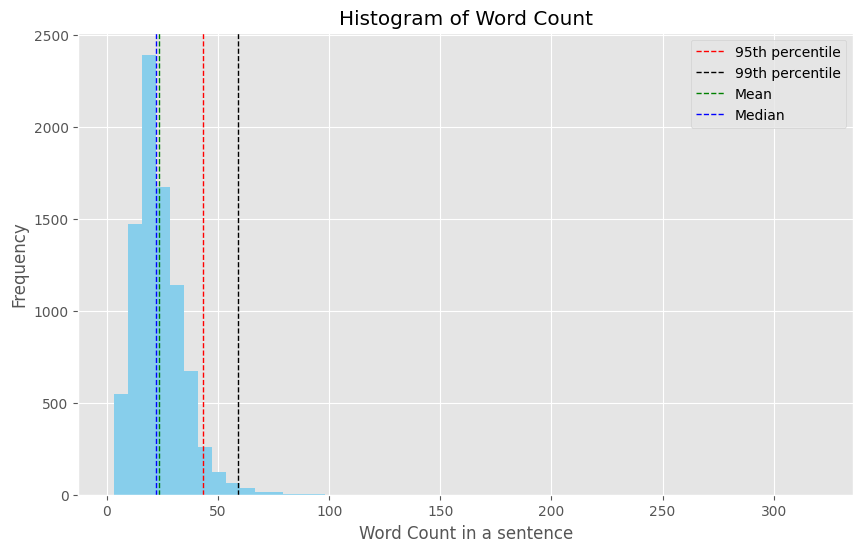

In [158]:
print(df['word_count'].describe())
# plot a histogram of the word count
plt.figure(figsize=(10,6))
plt.hist(df['word_count'], bins=50, color='skyblue')
# plot a vertical line at the 95th percentile
plt.axvline(df['word_count'].quantile(0.95), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['word_count'].quantile(0.99), color='black', linestyle='dashed', linewidth=1)
plt.axvline(df['word_count'].mean(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(df['word_count'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.legend(["95th percentile","99th percentile","Mean","Median"])
plt.xlabel("Word Count in a sentence")
plt.ylabel("Frequency")
plt.title("Histogram of Word Count")
plt.show()

In [159]:
# sentence with the longest word count
max_word_count = df['word_count'].max()
df[df['word_count'] == max_word_count]

book_number chapter_number prefix  \
1235          03            B03   Luke   

                                        normalized_text  word_count  
1235  |जब|यीशु|आप|उपदेश|करने|लगा|तो|लगभग|तीस|वर्ष|की...         320

In [160]:
def tokenize_hindi_text(text):
    # Tokenize the text
    tokens = processor.tokenizer(text, return_tensors="pt")
    
    # Get the input IDs
    input_ids = tokens.input_ids[0]
    
    # Convert input IDs back to tokens
    decoded_tokens = processor.tokenizer.convert_ids_to_tokens(input_ids)
    
    return decoded_tokens

# Example usage
hindi_text = "नमस्ते दुनिया"
tokenized = tokenize_hindi_text(hindi_text)
print(f"Original text: {hindi_text}")
print(f"Tokenized: {tokenized}")

# For multiple documents
documents = [
    "भारत एक विशाल देश है",
    "यह दुनिया का सबसे बड़ा लोकतंत्र है",
    "भारत में अनेक भाषाएँ बोली जाती हैं"
]

for doc in documents:
    tokens = tokenize_hindi_text(doc)
    print(f"\nOriginal: {doc}")
    print(f"Tokenized: {tokens}")

Original text: नमस्ते दुनिया
Tokenized: ['न', 'म', 'स', '्', 'त', 'े', '|', 'द', 'ु', 'न', 'ि', 'य', 'ा']

Original: भारत एक विशाल देश है
Tokenized: ['भ', 'ा', 'र', 'त', '|', 'ए', 'क', '|', 'व', 'ि', 'श', 'ा', 'ल', '|', 'द', 'े', 'श', '|', 'ह', 'ै']

Original: यह दुनिया का सबसे बड़ा लोकतंत्र है
Tokenized: ['य', 'ह', '|', 'द', 'ु', 'न', 'ि', 'य', 'ा', '|', 'क', 'ा', '|', 'स', 'ब', 'स', 'े', '|', 'ब', 'ड', '़', 'ा', '|', 'ल', 'ो', 'क', 'त', 'ं', 'त', '्', 'र', '|', 'ह', 'ै']

Original: भारत में अनेक भाषाएँ बोली जाती हैं
Tokenized: ['भ', 'ा', 'र', 'त', '|', 'म', 'े', 'ं', '|', 'अ', 'न', 'े', 'क', '|', 'भ', 'ा', 'ष', 'ा', 'ए', 'ँ', '|', 'ब', 'ो', 'ल', 'ी', '|', 'ज', 'ा', 'त', 'ी', '|', 'ह', 'ै', 'ं']


## tokenization EDA
by this we can see that the tokenizer trained for Indic Wave2vec is just a character level tokenizer . It does not group frequently occurring characters together something like Byte pair encoding algorithm does. 

In [161]:
from transformers import AlbertTokenizer, MBartForConditionalGeneration

tokenizer = AlbertTokenizer.from_pretrained("ai4bharat/IndicBART", do_lower_case=False, use_fast=False, keep_accents=True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [162]:
bos_id = tokenizer._convert_token_to_id_with_added_voc("<s>")
eos_id = tokenizer._convert_token_to_id_with_added_voc("</s>")
pad_id = tokenizer._convert_token_to_id_with_added_voc("<pad>")
# To get lang_id use any of ['<2as>', '<2bn>', '<2en>', '<2gu>', '<2hi>', '<2kn>', '<2ml>', '<2mr>', '<2or>', '<2pa>', '<2ta>', '<2te>']

In [165]:
# First tokenize the input and outputs.
# The format below is how IndicBART was trained so the input should be "Sentence </s> <2xx>" where xx is the language code.
# Similarly, the output should be "<2yy> Sentence </s>".

input_sentence = "|अन्त|में|उसने|अपने|पुत्र|को|उनके|पास|यह|कहकर|भेजा|कि|वे|मेरे|पुत्र|का|आदर|करेंगे|'"
output_sentence = "और अशुद्ध आत्माएँ भी, जब उसे देखती थीं, तो उसके आगे गिर पड़ती थीं"

# The input and output sentence is what the model needs for learning.
# Current example is translation but consider the following examples:
# Summarization:
# Input is "There was a child. She liked food. She decided to learn to make food. She became a world class chef. She won an award."
# Output is "A child learned cooking and won an award."
# Paraphrasing:
# Input is "I love to eat food."
# Output is "I am a foodie"

inp = tokenizer(input_sentence, add_special_tokens=False, return_tensors="pt", padding=True).input_ids

out = tokenizer(output_sentence, add_special_tokens=False, return_tensors="pt", padding=True).input_ids

print("Original input sentence:", input_sentence)
print("Segmented input sentence:", tokenizer.convert_ids_to_tokens(inp[0]))
print("Input sentence as tensor: ", inp)
print("Original output sentence:", output_sentence)
print("Segmented output sentence:", tokenizer.convert_ids_to_tokens(out[0]))
print("Output sentence as tensor:", out)

Original input sentence: |अन्त|में|उसने|अपने|पुत्र|को|उनके|पास|यह|कहकर|भेजा|कि|वे|मेरे|पुत्र|का|आदर|करेंगे|'
Segmented input sentence: ['▁|', 'अन्त', '|', 'में', '|', 'उस', 'ने', '|', 'अपने', '|', 'पुत्र', '|', 'को', '|', 'उन', 'के', '|', 'पास', '|', 'यह', '|', 'क', 'ह', 'कर', '|', 'भे', 'जा', '|', 'कि', '|', 'वे', '|', 'मे', 'रे', '|', 'पुत्र', '|', 'का', '|', 'आ', 'दर', '|', 'कर', 'ेंगे', '|', "'"]
Input sentence as tensor:  tensor([[  160, 17965,  1088, 15041,  1088, 20483,    59,  1088, 35814,  1088,
         11194,  1088,   394,  1088, 10333,   115,  1088,  7831,  1088, 25909,
          1088,    20,   232,   244,  1088,  5405,   643,  1088,   222,  1088,
           296,  1088,   335,    63,  1088, 11194,  1088,   109,  1088,   344,
           214,  1088,   244,  8618,  1088,   142]])
Original output sentence: और अशुद्ध आत्माएँ भी, जब उसे देखती थीं, तो उसके आगे गिर पड़ती थीं
Segmented output sentence: ['▁और', '▁अशुद्ध', '▁आत्मा', 'एँ', '▁भी', ',', '▁जब', '▁उसे', '▁देख', 'ती', '▁थीं

In [166]:
# getting a sense of what the tokens in the Indic Bart vocab look like
IndicBart_vocab = tokenizer.get_vocab()
IndicBart_vocab

{'<pad>': 0,
 '<unk>': 1,
 '[CLS]': 2,
 '[SEP]': 3,
 '[MASK]': 4,
 'ৰ': 5,
 '.': 6,
 ',': 7,
 '।': 8,
 'ੰ': 9,
 'ा': 10,
 'ੱ': 11,
 'े': 12,
 '▁के': 13,
 '▁क': 14,
 '▁है': 15,
 '-': 16,
 'र': 17,
 'त': 18,
 'ৱ': 19,
 'क': 20,
 'ि': 21,
 '▁the': 22,
 '▁आ': 23,
 'ु': 24,
 'ी': 25,
 '▁प': 26,
 'ं': 27,
 '्': 28,
 '▁दे': 29,
 '’': 30,
 '▁में': 31,
 'च': 32,
 '▁की': 33,
 '▁ने': 34,
 '▁छे': 35,
 's': 36,
 '▁कि': 37,
 'ल': 38,
 '▁.': 39,
 'न': 40,
 '▁': 41,
 '▁से': 42,
 '▁एक': 43,
 '▁का': 44,
 '▁को': 45,
 '▁पर': 46,
 '▁(': 47,
 'ना': 48,
 '▁दी': 49,
 '৷': 50,
 '▁of': 51,
 '▁।': 52,
 ':': 53,
 '▁नू': 54,
 ')': 55,
 '▁अ': 56,
 '▁to': 57,
 'ेर': 58,
 'ने': 59,
 '▁सि': 60,
 '▁ৰ': 61,
 '▁and': 62,
 'रे': 63,
 'द': 64,
 'ते': 65,
 '▁प्': 66,
 '▁in': 67,
 '▁ओ': 68,
 'म': 69,
 'स': 70,
 '▁व': 71,
 'नी': 72,
 '▁इस': 73,
 '▁स': 74,
 'ൽ': 75,
 '▁‘': 76,
 '▁ते': 77,
 'ർ': 78,
 '▁ई': 79,
 '▁a': 80,
 '▁और': 81,
 "▁'": 82,
 '▁वि': 83,
 '▁इ': 84,
 'ब': 85,
 'ता': 86,
 'ो': 87,
 '▁अने': 88,
 'कु': 89,
 'घ': 9

### Further EDA
possible scope of further EDA is there 
- visualizing / counting the number of tokens in our entire dataset.
- getting a sense of most frequently occuring tokens

This wont be as fruitful to us becuase I am not sure what tokenizer we will use for final TTS/STT training. Implementing or training a new okenizer can also be a good idea on our very own data. A simple BPE can be done on this dataset as well
